<img src="img/usmlogo.png" style="float:right;height:85px">
<img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 3 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Renato Bassi Castillo ; 201773521-K ; Malla Nueva </h4>
    <h4> Joaquín Castillo Tapia ; 201773520-1 ; Malla Nueva </h4>
    <h4> Axel Reyes Orellana ; 201773502-3 ; Malla Nueva </h4>
    <center><h4>Agosto 2019</h4></center>
</center> 


In [62]:
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice
import csv
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from scipy.stats import norm
from scipy.stats import t as ts
sns.set()
%matplotlib inline 

## 1. Test de Hipótesis (25p)

Muchos procesos estadísticos utilizados asumen la normalidad de los datos para poder trabajar, la normalidad de los datos simplifica el trabajo en muchos casos, pero, ¿es posible asumir siempre esta normalidad?, como la respuesta es claramente "no" en esta sección trabajará el [Test de hipótesis de Shapiro-Wilks](http://riotorto.users.sourceforge.net/R/noparam_shapiro/) cuya utilidad es poder determinar si un conjunto de datos sigue una distribución normal o no. (Queda propuesto para el estudiante investigar más sobre este test)

Recordando el trabajo realizado en el laboratorio anterior, respecto al teorema del límite central, utilizaremos la misma distribución dada para trabajar con este test de hipótesis 

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.2     |
|   9   |     0.10     |
|   10  |     0.05     |
|   11  |     0.2      |
|   12  |     0.05     |

Se trabajará con 3 muestras:

* Una muestra de tamaño 1000 de la población original (distribución dada)
* La distribución de 1000 medias de muestras de tamaño 12 
* La distribución de 1000 medias de muestras de tamaño 120

--------------
>a) A priori ¿Qué muestra/s esperaría usted que siguieran una distribución normal? ¿Cuáles no? Responda utilizando el teorema del límite central. (Independiente de lo que obtenga en b), el puntaje se dará según la justificación que se de)

**R.-** Según lo  estudiado en el laboratorios anteriores, las tres muestras se comportaran como una distribución normal, ya que todas se obtienen  a partir de una gran número de repeticiones. Pero es necesario destacar que la *mustra 3* será la más cercana a la distribución normal teórica postulada por el *Teorema del Limite Central* ya que obtiene muestras a partir de 120 datos generados, que es un orden de magnitud mayor a la *muestra 2*, y  dos ordenes de magnitud mayor a la *muestra 1*, lo que permite una mustra más representativa de los datos.

----------------
>b) Realice el test de hipótesis de shapiro-wilk **utilizando las funciones provistas por los lenguajes** y comente las muestras que cumplen con la normalidad de datos y las que no bajo un nivel de significancia del 1% y 5%. Compare los resultados que obtiene con cada nivel de significancia para cada muestra y comente.

Funciones a utilizar
---------------

**Elegir( list v, list p, int n, int P)**

Función que genera una lista de largo **_P_**, en donde cada elemento es la media aritmética de una lista de largo **_n_** generada a partir de los valores de la lista **_v_** en base a la probabilidad señalada por la lista **_p_**.

In [63]:
def Elegir(v,p,n,P):
    np.random.seed(2019)
    r=[]
    for i in range(P):
        l = np.random.choice(v,size=n,p=p)
        m = np.mean(l)
        r.append(m)
    return r

--------------------
Desarrollo
-----------

Se presentan dos listas, con los datos de la tabla, para futuros cálculos:

In [64]:
v = [1,2,5,6,7,9,10,11,12]  # Valores
p = [0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05] # Probabilidades

Se generan las muestras solicitadas para el estudio a partir de los datos de la tabla:

In [65]:
muestra1 = Elegir(v,p,1,1000)
muestra2 = Elegir(v,p,12,1000)
muestra3 = Elegir(v,p,120,1000)

Se calcula el estadístico de contraste $(W)$ y la probabilidad crítica $(p_c)$ de cada muestra:

**Muestra 1** 

In [66]:
x = shapiro(muestra1)
print("W = ",x[0])
print("p-value = ",x[1])

W =  0.8827991485595703
p-value =  8.183033666528372e-27


**Muestra 2**

In [67]:
x = shapiro(muestra2)
print("W = ",x[0])
print("p-value = ",x[1])

W =  0.9984117150306702
p-value =  0.4983111321926117


**Muestra 3**

In [68]:
x = shapiro(muestra3)
print("W = ",x[0])
print("p-value = ",x[1])

W =  0.9968850016593933
p-value =  0.04723530635237694


---------------------------
Los datos obtenidos nos indican que para un nivel de **_significancia_** del **_1%_** las **_muestras 2_** y **_3_** son aprobadas, ya que su probabilidad crítica es de $0.498$ y $0.047$ respectivamente, menores al **_1%_** establecido. Por lo tanto no se descarta que sus datos provengan de una distribución normal.
En cuanto a la **_muestra 1_**, se obtuvo una probabilidad crítica de $ 8,18 \times 10^{-27} $ lo que es menor al **_1%_** establecido, por lo tanto se rechaza la hipótesis, y se dice que la muestra no sigue una distribución normal.

Si analizamos las muestras con un nivel de **_significancia_** del **_5%_** obtenemos otros resultados, pues sólo la **_muestra 2_** es aprobada, ya que su probabilidad crítica es de $0.498$, un valor muy superior al establecido por el **_5%_**. En consecuencia, no se puede descartar que la muestra siga una distribución normal.
Para las muestras restantes, se obtuvieron probabilidaddes críticas de $ 8,18 \times 10^{-27} $ y $0.047$ a partir de las **_muestras 1_** y **_3_** respectivamente, los cuales son menores al valor establecido por el **_5%_**. Por lo tanto, se rechaza la hipótesis y se concluye que las muestras no siguen una distribución normal.

Al comparar los resultados para cada nivel de **_significancia_**, evidenciamos que la **_muestra 3_** es rechazada sólo para uno de los casos (**_5%_**), indicando que dependiendo del nivel de significancia que buscamos podemos considerarla o no como una posible distribución normal. No es el caso de las otras muestras, ya que la **_muestra 1_** fue rechazada en ambos análisis, y la muestra 2 fue considerada como posible distribución normal para ambos niveles de significancia. Esto último permite tener un mayor nivel de seguridad en la decisíón final al rechazar la hipótesis de la **_muestra 1_**.

-----------
>c) ¿Qué sucede a medida que el nivel de significancia se acerca a 0? ¿Qué puede concluir acerca del nivel de significancia que se utiliza?

**R.-** A medida que la significancia se acerca a cero, menos muestras de datos son rechazadas. Por ende se podría considerar una muestra que está muy lejos de comportarse como una distribución normal, es decir, aumenta la probabilidad de equivocarse.

En el caso de la pregunta, con niveles de significancia del 1% y del 5%, es posible decir que la probabilidad de error es muy alta, pues se están incluyendo muchos casos, en donde no todos provienen de una distribución normal. En otras palabras, si se quiere estar seguro de la decisión, se debe usar un nivel de significancia del 100%.

## 2. Bootstrap e Intervalos de Confianza (30p) 

Suponga que tiene una muestra  <b>M</b> de una población <b>P</b> y esta muestra <b>M</b> es de tamaño <b>N</b>. Queremos obtener algún estimador $ \theta $ de <b>P</b> a partir de <b>M</b> ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra <b>M</b>, sacamos un papelito, <b>lo volvemos a guardar en la bolsa</b> y repetimos este proceso <b>N</b> veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso <b>B</b> veces y terminamos con un conjunto de <b>B</b> estimadores. 

En esta sección trabajará con una muestra de una población $N\sim (50,20)$ muestra.csv

[Método Bootstrap](https://www.youtube.com/watch?v=ZCXg64l9R_4)

>*Construir intervalos de confianza bootstrap queda pendiente para el estudiante* 

Nos interesará probar la construcción de un intervalo de confianza para la media y desviación estándar utilizando solamente la muestra de esta población. 

>a) Utilizando el método bootstrap **a mano** (no funciones de los lenguajes) construya 1000 intervalos de confianza para la media y la desviación estándar, luego grafique cada intervalo y el valor teórico de la media/varianza y concluya respecto a lo que observa. Haga este proceso para un nivel de significancia de 85%, 95% y 99%, comente lo que observe y concluya. 

*PD: La ausencia de conclusión respecto a los distintos niveles de significancia implica 0 puntos en la pregunta*

> **Hint:** Puede contrastar lo obtenido con lo esperado

Desarrollo
-----------

Se leen los datos y se guardan en una lista

In [69]:
muestra = []
with open('muestra.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')      
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            dato = row[1]
            muestra.append(float(dato))

Se definen variables para los cálculos siguientes

In [70]:
coord_media85 = []
coord_media95 = []
coord_media99 = []

min1 = 999
min2 = 999
min3 = 999
min4 = 999
min5 = 999
min6 = 999

max1 = -999
max2 = -999
max3 = -999
max4 = -999
max5 = -999
max6 = -999

coord_desv85 = []
coord_desv95 = []
coord_desv99 = []

Se calcula la media de la muestra original

In [71]:
media_real = np.mean(muestra)
print(media_real)

47.50880927550732


Se calcula la desviación estándar de la muestra original

In [72]:
desv_real = np.std(muestra)  
print(desv_real)

19.39059370805467


Se repite el procedimiento para obtener los 1000 intervalos de confianza

El siguiente bloque de código demora mucho en ejecutarse (2-3 minutos máximo)
Cuando se imprima "Intervalos calculados exitósamente" habrá terminado.

In [73]:
for i in range(1000):                 
    medias = []
    desv_stdr = []
    #Se realizan 1000 muestras bootstrap
    for b in range(1000):
        muestras = []
        #Se escogen 100 datos aleatoriamente de la muestra original para la muestra 
        for n in range(100):
            muestras.append(choice(muestra))
        
        #Se calcula la media de la muestra bootstrap 
        media_bootstrap = sum(muestras)/100
        
        #Se calcula la desviación de la media para utilizar posteriormente el método de los percentiles
        sigmaM = media_real - media_bootstrap
        medias.append(sigmaM)
        
        #Se calcula la desviación estándar de la muestra bootstrap 
        desv_bootstrap = np.std(muestras)
        
        #Se calcula la desviación de la desviación estándar para utilizar posteriormente el método de los percentiles
        sigmaD = desv_real - desv_bootstrap
        desv_stdr.append(sigmaD)
        
    #Se ordenan ascendentemente las desviaciones de la media y desviación estándar
    medias.sort()
    desv_stdr.sort()
     
    #Luego para determinar los intervalos de confianza de cada dato, media y desviación estándar, se utiliza 
    #el método de los percentiles, el cual dice que si se quiere una confianza de x% con tamaño de la muestra n,
    #el límite inferior del intervalo estará dado por la resta entre la muestra o desviación estándar de la muestra 
    # original, según sea el caso, y la desviaciones correspondientes a las posiciones: ((100-x)/2)*(n/100) para
    #el límite inferior, y n-((100-x)/2)*(n/100) para el límite superior.
    
    # Nivel de confianza de 85%
    
    # Media
    lim_inf85_media = media_real - medias[74]     #Notar que la posición no es 75 exacto ya que comienza desde 0
    lim_sup85_media = media_real - medias[924]
    if(lim_inf85_media < min1):                   
        min1 = lim_inf85_media
    if(lim_sup85_media > max1):                 #Se guardan los límites más extremos para dimensionar el gráfico
        max1 = lim_sup85_media                    
        
    y1 = [lim_inf85_media, lim_sup85_media]
    x1 = [i,i]
    coord_media85.append((x1,y1))  #Se guardan las coordenadas de los intervalos para graficarlos posteriormente
    
    # Desviación Estándar
    lim_inf85_desv = desv_real - desv_stdr[74]
    lim_sup85_desv = desv_real - desv_stdr[924]
    if(lim_inf85_desv < min2):
        min2 = lim_inf85_desv
    if(lim_sup85_desv > max2):
        max2 = lim_sup85_desv
    y1 = [lim_inf85_desv, lim_sup85_desv]
    x1 = [i,i]
    coord_desv85.append((x1,y1))
    
    
    # Nivel de confianza de 95%
    
    # Media
    lim_inf95_media = media_real - medias[24]
    lim_sup95_media = media_real - medias[974]
    if(lim_inf95_media < min3):
        min3 = lim_inf95_media
    if(lim_sup95_media > max3):
        max3 = lim_sup95_media
    y1 = [lim_inf95_media, lim_sup95_media]
    x1 = [i,i]
    coord_media95.append((x1,y1))
    
    # Desviación Estándar
    lim_inf95_desv = desv_real - desv_stdr[24]
    lim_sup95_desv = desv_real - desv_stdr[974]
    if(lim_inf95_desv < min4):
        min4 = lim_inf95_desv
    if(lim_sup95_desv > max4):
        max4 = lim_sup95_desv
    y1 = [lim_inf95_desv, lim_sup95_desv]
    x1 = [i,i]
    coord_desv95.append((x1,y1))
    
    
    # Nivel de confianza de 99%
    
    # Media
    lim_inf99_media = media_real - medias[4]
    lim_sup99_media = media_real - medias[994]
    if(lim_inf99_media < min5):
        min5 = lim_inf99_media
    if(lim_sup99_media > max5):
        max5 = lim_sup99_media
    y1 = [lim_inf99_media, lim_sup99_media]
    x1 = [i,i]
    coord_media99.append((x1,y1))
    
    # Desviación Estándar
    lim_inf99_desv = desv_real - desv_stdr[4]
    lim_sup99_desv = desv_real - desv_stdr[994]
    if(lim_inf99_desv < min6):
        min6 = lim_inf99_desv
    if(lim_sup99_desv > max6):
        max6 = lim_sup99_desv
    y1 = [lim_inf99_desv, lim_sup99_desv]
    x1 = [i,i]
    coord_desv99.append((x1,y1))
    
print("Intervalos calculados exitósamente")

Intervalos calculados exitósamente


--------------
Gráfico de los intervalos de confianza de 85% de la media:

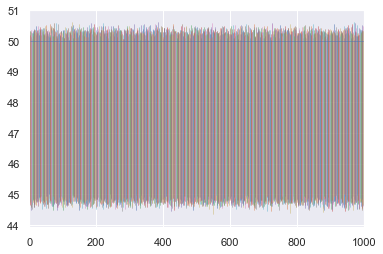

In [74]:
x1 = [0,1000]
y1 = [50,50]
coord_media85.append((x1,y1))              #Se agregan las coordenadas del valor real (linea horizontal)

for intervalo in coord_media85:
    plt.axis([0, 1000, min1-6, max1+6])
    plt.plot(intervalo[0],intervalo[1],linewidth=0.5)
plt.show()

Gráfico de los intervalos de confianza de 85% de la desviación estándar:

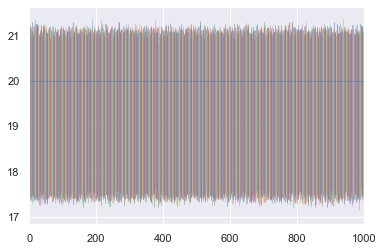

In [75]:
x1 = [0,1000]
y1 = [20,20]
coord_desv85.append((x1,y1))               #Se agregan las coordenadas del valor real (linea horizontal)

for intervalo in coord_desv85:
    plt.axis([0, 1000, min2-4, max2+4])
    plt.plot(intervalo[0],intervalo[1],linewidth=0.5)
plt.show()

----------------
Gráfico de los intervalos de confianza de 95% de la media:

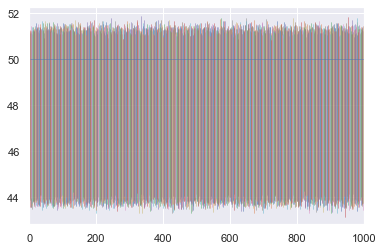

In [76]:
x1 = [0,1000]
y1 = [50,50]
coord_media95.append((x1,y1))

for intervalo in coord_media95:
    plt.axis([0, 1000, min3-8, max3+8])
    plt.plot(intervalo[0],intervalo[1],linewidth=0.5)
plt.show()

Gráfico de los intervalos de confianza de 95% de la desviación estándar

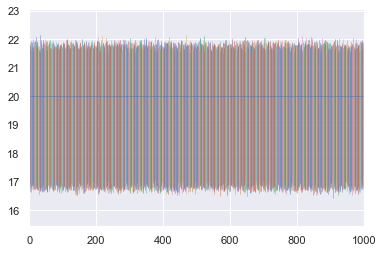

In [77]:
x1 = [0,1000]
y1 = [20,20]
coord_desv95.append((x1,y1))

for intervalo in coord_desv95:
    plt.axis([0, 1000, min4-6, max4+6])
    plt.plot(intervalo[0],intervalo[1],linewidth=0.5)
plt.show()

---------------
Gráfico de los intervalos de confianza de 99% de la media:

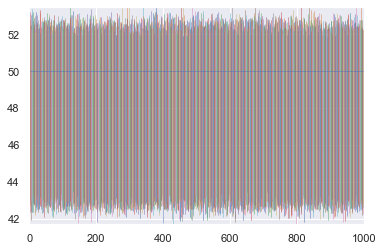

In [78]:
x1 = [0,1000]
y1 = [50,50]
coord_media99.append((x1,y1))

for intervalo in coord_media99:
    plt.axis([0, 1000, min5-10, max5+10])
    plt.plot(intervalo[0],intervalo[1],linewidth=0.5)
plt.show()

Gráfico de los intervalos de confianza de 99% de la desviación estándar:

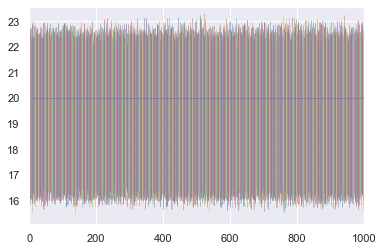

In [79]:
x1 = [0,1000]
y1 = [20,20]
coord_desv99.append((x1,y1))

for intervalo in coord_desv99:
    plt.axis([0, 1000, min6-7, max6+7])
    plt.plot(intervalo[0],intervalo[1],linewidth=0.5)
plt.show()

--------------
**Análisis y Respuesta**

Se asume que la muestra es independiente e idénticamente distribuida (IID) para poder realizar las estimaciones correspondientes. También se asume de que en el enunciado al decir 85% 95% y 99% de nivel de significancia en realidad quería decir confianza (nivel de significancia = alpha = error).

Teóricamente, a medida que disminuye el nivel de significancia el intervalo se hace cada vez más extenso, de manera que al abarcar un mayor rango se reduce la probabilidad de equivocarse.
Esto se puede apreciar claramente en los gráficos, ya que se obtiene que los intervalos son apróximadamente los siguientes:

Confianza 85%:
Media [44.5, 50.5]
Desviación Estándar [17.5, 21.5]

Confianza 95%:
Media [43, 52]
Desviación Estándar [16.5, 22]

Confianza 85%:
Media [42, 54]
Desviación Estándar [15, 23]

Claramente se comprueba la teoría de que a medida que disminuye el nivel de significancia los intervalos se vuelven más grandes, siendo esto un detalle que se debe tener muy en cuenta a la hora de requerir precisión y confianza.

Finalmente, cabe mencionar que los valores reales (50,20) en los 6 gráficos se encuentran dentro de los intervalos de confianza, por lo que el método bootstrap es efectivo.
Sin embargo, en el gráfico de 85% los valores reales se encuentran al borde de los intervalos, de manera que no es recomendable usar el 85% o menos de confianza debido a que se corre el riesgo de cometer estimaciones erróneas.

PD: Disculpas de antemano si la linea horizontal sale de un color inconveniente y no se distingue fácilmente :(

## 3. Regresión Lineal (45p)

Uno de los aspectos más importantes de estadística es el análisis de la relación entre dos variables, uno de los modelos más simples para esto es la *Regresión Lineal Simple* donde se estudia una relación lineal entre la variable dependiente e independiente, esto no tiene por qué solamente ser univariado (X e Y) si no que puede ser también multivariado donde se tiene un vector de variables independientes que determinan a una variable de interés.

La regresión lineal simple de mínimos cuadrados es un modelo para representar una relación lineal entre dos variables mediante la ecuación: $Y = a\cdot X + b + \epsilon$. Este será el modelo que se trabajará en esta sección.

Se trabajará con LRData.csv 

>a) Construya un modelo de regresión lineal donde X sea la variable independiente y la columna "Valor" la variable dependiente, luego calcule el MSE (mean standard error) de su modelo 

$$ MSE = \frac{\sum \left(\hat{Y_{i}}- Y_{i}\right)^{2}}{n} $$

$$\hat{Y}: \; prediccion$$

$$Y: \; valor\, verdadero$$

Desarrollo
----------

Funciones a Utilizar
----------

**MSE( array Y_ , array Y)**

Función que calcula el Mean Standar Error en base al los valores predichos del arreglo Y_ y los valores normales del arreglo

In [80]:
def MSE(Y_, Y):
    mse = 0
    i = 0
    n = len(Y)
    
    while(i<n):
        mse += (Y_[i] - Y[i])**2
        i+=1
        
    mse /= n
    
    return mse

**LR( array X, array Y)**

Función que calcula la regesión lineal de los datos de entrenamiento X e Y. Retorna una tupla con la pendiente y el coeficiente de posición de la recta de regresión lineal.

In [81]:
def LR(X, Y):
    n = len(X)
    sumx = np.sum(X)
    sumy = np.sum(Y)
    sumxy = np.sum(X*Y)
    sumx2 = np.sum(X**2)
    promy = np.mean(Y)
    promx = np.mean(X)
    
    a = (sumx*sumy-n*sumxy)/(sumx**2 - n*sumx2)
    b = promy - a*promx
    
    return (a, b)

**Y_PRED( array X_test , X_train , Y_train)**

Función que retorna una lista que contiene la predicción de los valores de Y a partir de los valores de X_test a partir de los datos de entrenamiento X_train e Y_train.

In [82]:
def Y_PRED(X_test, X_train, Y_train):
    lr = LR(X_train, Y_train)

    Y_p = []
    for x in X_test:
        Y_p.append(x*lr[0]+lr[1])
    
    return Y_p

----------------
En primera instancia se nos pide calcular el MSE del modelo

In [83]:
data = pd.read_csv('LRData.csv')

X = data['x'].values.reshape(-1,1)
Y = data['y'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.2, random_state = 2019)
Y_pred = Y_PRED(X_test, X_train, Y_train)
print(MSE(list(Y_pred), list(Y_test)))

[94650.61123406]


Podemos observar que el MSE obtenido es muy grande, lo cual significa que hay grupos de datos muy dispersadas de otros.

>b) Construya un scatterplot donde grafique tanto los valores predichos por el modelo como los valores originales de la variable independiente en función de X. Al observar el gráfico ¿cree que sería posible mejorar el MSE obtenido en a)?

Desarrollo
----------

Se construye el Scatterplot con los datos obtenidos

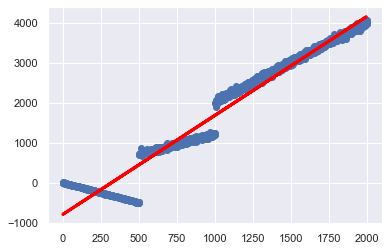

In [84]:
plt.scatter(X, Y)
plt.plot(X_test, Y_pred, color = 'red', linewidth = 3)
plt.show()

### Problema
Como evidenciamos en el punto a), hay 3 grupos claramente diferenciables por la disperción entre estos, lo cual provoca que la regresión lineal sea poco representativa para el modelo.

### Solución

A modo de solucionar esto, proponemos separar el dataset en tres partes, de modo que podamos crear una función por partes.

>c) Si en b) respondió que no, saltese esta pregunta, caso contrario, implemente su solución, verifique el MSE disminuye y vuelva a graficar los valores.

Desarrollo
-----------

Se divide el dataset en base a los tres grupos encontrados, a cada uno se le calcula el Mean Standar Error:

**Grupo 1**

In [85]:
X1 = X[:501]
Y1 = Y[:501]

X1_train, X1_test, Y1_train, Y1_test = tts(X1, Y1, test_size = 0.2,random_state=2019)

Y1_pred = Y_PRED(X1_test, X1_train, Y1_train)

print("MSE Grupo 1: ", MSE(list(Y1_pred), list(Y1_test)))

MSE Grupo 1:  [38.00888371]


**Grupo 2**

In [86]:
X2 = X[501:1001]
Y2 = Y[501:1001]
X2_train, X2_test, Y2_train, Y2_test = tts(X2, Y2, test_size = 0.2,random_state=2019)

Y2_pred = Y_PRED(X2_test, X2_train, Y2_train)

print("MSE Grupo 2: ", MSE(list(Y2_pred), list(Y2_test)))

MSE Grupo 2:  [872.60717427]


**Grupo 3**

In [87]:
X3 = X[1001:]
Y3 = Y[1001:]
X3_train, X3_test, Y3_train, Y3_test = tts(X3, Y3, test_size = 0.2,random_state=2019)

Y3_pred = Y_PRED(X3_test, X3_train, Y3_train)

print("MSE Grupo 3: ", MSE(list(Y3_pred), list(Y3_test)))

MSE Grupo 3:  [1643.85060513]


Se construye el Scatterplot con los nuevos datos generados:

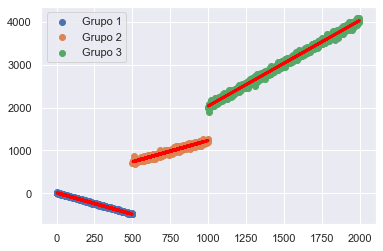

In [88]:
plt.scatter(X1, Y1,label="Grupo 1")
plt.plot(X1_test, Y1_pred, color = 'red', linewidth = 3,)
plt.scatter(X2, Y2,label="Grupo 2")
plt.plot(X2_test, Y2_pred, color = 'red', linewidth = 3)
plt.scatter(X3, Y3,label="Grupo 3")
plt.plot(X3_test, Y3_pred, color = 'red', linewidth = 3)
plt.legend()
plt.show()

### Menor MSE

Hay una baja notoria del MSE, y esto se evidencia en el gráfico al ver que la regresión lineal esta mucho mejor ajustada que en el punto b).

>d) Utilizando su solución propuesta en c) calcule un intervalo de confianza con un nivel de 90%, 95% y 99% de confiabilidad cuando X = 749


Desarrollo
---------

Funciones a utilizar
----------

**IC( array Y_test, float yr, float a)**

Función que calcula el intervalo de confianza a partir de un Y_test, un pívot yr, y un nivel de confiabilidad a.

In [89]:
def IC(yt, yr, a):
    y = np.mean(yt)
    t = ts.ppf(a, len(yt)-1)
    v = np.sum((yt-y)**2)
    v /= len(yt)-1
    n = len(yt)
    li = yr - t*(v/n)**0.5
    ls = yr + t*(v/n)**0.5
    return [li[0], ls[0]]

Se genaran la Regresión Lineal con los datos de entrenamiento y luego se calculan los intervalos de confianza para cada nivel de confiabilidad:

In [90]:
lr2 = LR(X2_train, Y2_train)

----------------
Confiabilidad del 99%:

In [91]:
print("IC con un  nivel de confianza del 99%", IC(Y2_test, Y[749], 0.99))

IC con un  nivel de confianza del 99% [883.2483490813404, 954.7971606677108]


Confiabilidad del 95%:

In [92]:
print("IC con un  nivel de confianza del 95%", IC(Y2_test, Y[749], 0.95))

IC con un  nivel de confianza del 95% [893.9024978546269, 944.1430118944244]


Confiabilidad del 90%:

In [93]:
print("IC con un  nivel de confianza del 90%", IC(Y2_test, Y[749], 0.9))

IC con un  nivel de confianza del 90% [899.503747619006, 938.5417621300452]


>e) Comente como se debería implementar la solución dada en c) utilizando el método bootstrap y luego proceda a implementarla, compare ambos modelos resultantes y comente respecto al desempeño de éstos. Puede mencionar otros aspectos también (complejidad, implementación, etc).

Desarrollo
----------

Funciones a utilizar
---------

**ICB( array X, array Y, int x, int a)**

Función que calcula los intervalos de confianza con muestras boostrap a partir de los datos X e Y originales, el pívot x y el nivel de confianza a.

In [94]:
def ICB(X, Y, x, a):

    y_real = Y[x-501]
    lrs = []
    
    np.random.seed(2019)
    
    #Se realizan 1000 muestras bootstrap
    for b in range(1000):
        #Se elige el mismo numero de muestras que el de regresión lineal, para poder hacer una comparación de los intervalos.
        X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.2)
        
        #Se calcula la regresión lineal de la muestra bootstrap 
        lr_b = LR(X_train, Y_train)
        y_bootstrap = lr_b[0]*x + lr_b[1]
        
        #Se calcula la desviación de la regresión lineal para utilizar posteriormente el método de los percentiles
        sigmaM = y_real - y_bootstrap
        lrs.append(sigmaM)
        

        
    #Se ordenan ascendentemente las desviaciones de la media y desviación estándar
    lrs.sort()
    #Luego para determinar los intervalos de confianza de cada dato, muestra y desviación estándar, se utiliza 
    #el método de los percentiles, el cual dice que si se quiere una confianza de x% con tamaño de la muestra n,
    #el limite inferior del intervalo estará dado por la resta entre la muestra o desviación estándar de la muestra 
    # original según sea el caso y la desviación correspondiente a la posición: ((100-x)/2)*(n/100) para el límite
    #inferior, y n-((100-x)/2)*(n/100) para el límite superior.
    
    # Nivel de confianza de 85%
    
    # Media
    n = 1000 

    lim_inf_lr = y_real - np.abs(lrs[int(n-((100-a)/2)*(n/100)-1)])
    #Notar que la posición no es 75 exacto ya que comienza desde 0
    lim_sup_lr = y_real + np.abs(lrs[int(((100-a)/2)*(n/100)-1)])
        
    y1 = [lim_inf_lr, lim_sup_lr]
    
    return y1

---------------
Se aplica la función ICB a los datos con un nivel de 90%, 95% y 99% al grupo X2 e Y2, ya que X=749 se encuentra en el segundo grupo de datos.

Confiabilidad del 99%:

In [95]:
boot99 = ICB(X2[:, 0], Y2[:, 0], 749, 99)
print("IC con un  nivel de confianza del 99% con bootstrap", boot99)

IC con un  nivel de confianza del 99% con bootstrap [861.2636458471685, 980.1746307902471]


Confiabilidad del 95%:

In [96]:
boot95 = ICB(X2[:, 0], Y2[:, 0], 749, 95)
print("IC con un  nivel de confianza del 95% con bootstrap", boot95)

IC con un  nivel de confianza del 95% con bootstrap [860.8992267016223, 979.8067792952712]


Confiabilidad del 90%:

In [97]:
boot90 = ICB(X2[:, 0], Y2[:, 0], 749, 90)
print("IC con un  nivel de confianza del 90% con bootstrap", boot90)

IC con un  nivel de confianza del 90% con bootstrap [860.6480599334249, 979.605880946943]
